In [1]:
import pandas as pd
import numpy as np

from collections import Counter
import time
import re
import matplotlib.pyplot as plt

In [2]:
corpus = pd.read_csv('remotelist.csv')

In [3]:
corpus.shape

(5496, 6)

In [4]:
corpus.head(2)

,id,text,mes_date,views,mes_title,mes_description
0,5547,Новые вакансии на remotelist.ru\n\n— Software...,2019-10-15 05:16:34+00:00,26.0,Вакансия Software Engineer в компанию Theore...,Компания Theorem ищет специалиста Software En...
1,5546,Новые вакансии на remotelist.ru\n\n— UI/UX про...,2019-10-15 03:16:29+00:00,61.0,Вакансия UI/UX продуктовый дизайнер в компанию...,Компания Solves.pro ищет специалиста UI/UX про...


In [5]:
corpus.mes_date = pd.to_datetime(corpus.mes_date)
corpus = corpus[['id', 'text', 'mes_date', 'views', 'mes_title', 'mes_description']]
corpus.text = corpus.text.fillna('').astype(str)

def remove_links_and_quotes(text):
    try:
        return ' '.join([word for word in text.split() if 'http' not in word and '@' not in word])
    except:
        pass
corpus.text = corpus.text.apply(lambda x: remove_links_and_quotes(x))
corpus.mes_title = corpus.mes_title.apply(lambda x: remove_links_and_quotes(x))
corpus.mes_description = corpus.mes_description.apply(lambda x: remove_links_and_quotes(x))
corpus.fillna('', inplace=True)

corpus = corpus[corpus.text.apply(lambda x: len(x) > 0)]
corpus.text = corpus.text.apply(lambda x: ' '.join(re.split('\W+', x.lower())))
corpus.mes_title = corpus.mes_title.apply(lambda x: ' '.join(re.split('\W+', x.lower())))
corpus.mes_description = corpus.mes_description.apply(lambda x: ' '.join(re.split('\W+', x.lower())))
corpus.sort_values('mes_date', inplace=True, ascending=True)

corpus.head(10)

,id,text,mes_date,views,mes_title,mes_description
5494,42,новые вакансии за последние 2 часа,2018-03-09 20:37:02+00:00,133,новые вакансии за последние 2 часа,за последние 2 часа было опубликовано 5 ваканс...
5493,43,новые вакансии за последние 2 часа,2018-03-09 22:37:07+00:00,153,новые вакансии за последние 2 часа,за последние 2 часа было опубликовано 3 ваканс...
5492,44,новые вакансии за последние 2 часа,2018-03-10 00:37:14+00:00,169,новые вакансии за последние 2 часа,за последние 2 часа было опубликовано 4 ваканс...
5491,45,новые вакансии за последние 2 часа,2018-03-10 12:37:45+00:00,194,новые вакансии за последние 2 часа,за последние 2 часа было опубликовано 2 ваканс...
5490,46,новые вакансии за последние 2 часа,2018-03-10 14:37:50+00:00,231,новые вакансии за последние 2 часа,за последние 2 часа было опубликовано 1 ваканс...
5489,47,новые вакансии за последние 2 часа,2018-03-10 16:37:55+00:00,257,новые вакансии за последние 2 часа,за последние 2 часа было опубликовано 1 ваканс...
5488,48,новые вакансии за последние 2 часа,2018-03-10 18:38:01+00:00,219,новые вакансии за последние 2 часа,за последние 2 часа было опубликовано 1 ваканс...
5487,49,новые вакансии на remotelist ru grc archer dev...,2018-03-11 06:35:09+00:00,226,требуется grc archer development engineer в ко...,компания jp morgan chase ищет специалиста grc ...
5486,50,новые вакансии за последние 2 часа,2018-03-11 06:39:10+00:00,234,новые вакансии за последние 2 часа,за последние 2 часа было опубликовано 6 ваканс...
5485,51,новые вакансии за последние 2 часа,2018-03-11 08:39:15+00:00,245,новые вакансии за последние 2 часа,за последние 2 часа было опубликовано 1 ваканс...


In [6]:
corpus.to_csv('remotelist_preproc.csv', index=None)

In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

def tokenize_me(file_text):
    #firstly let's apply nltk tokenization
    tokens = nltk.word_tokenize(file_text)

    #drop stop_words
    stop_words = stopwords.words('russian')
    stop_words.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на', 'за', 'было','требуемые','навыки','ищет', 'удалённо', 'специалиста', 'компания'])
    stop_words.extend(stopwords.words('english'))
    tokens = [i for i in tokens if ( i not in stop_words )]
    
    #cleaning words
    tokens = [i.replace("«", "").replace("»", "") for i in tokens]

    return ' '.join(tokens)

corpus.mes_description = corpus.mes_description.apply(lambda x: tokenize_me(x))
corpus.head(10)

corpus.to_csv('remotelist_tokens.csv', index=None)


[nltk_data] Downloading package punkt to /home/renat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/renat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
corpus.mes_description

5494    последние 2 часа опубликовано 5 вакансий block...
5493    последние 2 часа опубликовано 3 вакансий remot...
5492    последние 2 часа опубликовано 4 вакансий senio...
5491    последние 2 часа опубликовано 2 вакансий интер...
5490    последние 2 часа опубликовано 1 вакансий backe...
5489    последние 2 часа опубликовано 1 вакансий senio...
5488    последние 2 часа опубликовано 1 вакансий front...
5487    jp morgan chase grc archer development enginee...
5486    последние 2 часа опубликовано 6 вакансий senio...
5485    последние 2 часа опубликовано 1 вакансий senio...
5484    x team blockchain crypto developer node js eth...
5483    komoot quality assurance specialist f qa andro...
5482          meetedgar meetedgar director marketing saas
5481    storehouse box llc customer service representa...
5480    cinemassive senior software developer tdd agil...
5479    rootsrated media software engineer react js po...
5478    hazelcast software engineer cloud java kuberne...
5477    grooni

In [9]:
corpus.groupby('mes_title')['text'].count().sort_values(ascending=False).head(20)

mes_title
новые вакансии за последние 2 часа                                                                                               9
требуется lead full stack ruby engineer в компанию railsware удалённая работа на remotelist                                      8
none                                                                                                                             7
требуется senior front end javascript engineer в компанию revjet удалённая работа на remotelist                                  7
требуется frontend markup developer rich media advertising banners в компанию revjet удалённая работа на remotelist              6
требуется web программист php laravel в компанию fonbrand llc удалённая работа на remotelist                                     6
требуется delight customers matchmaker в компанию tawkify удалённая работа на remotelist                                         6
вакансия senior python developer в компанию svitla systems inc удалённая 

In [10]:
total_history = corpus['mes_date'].dt.date.sort_values()

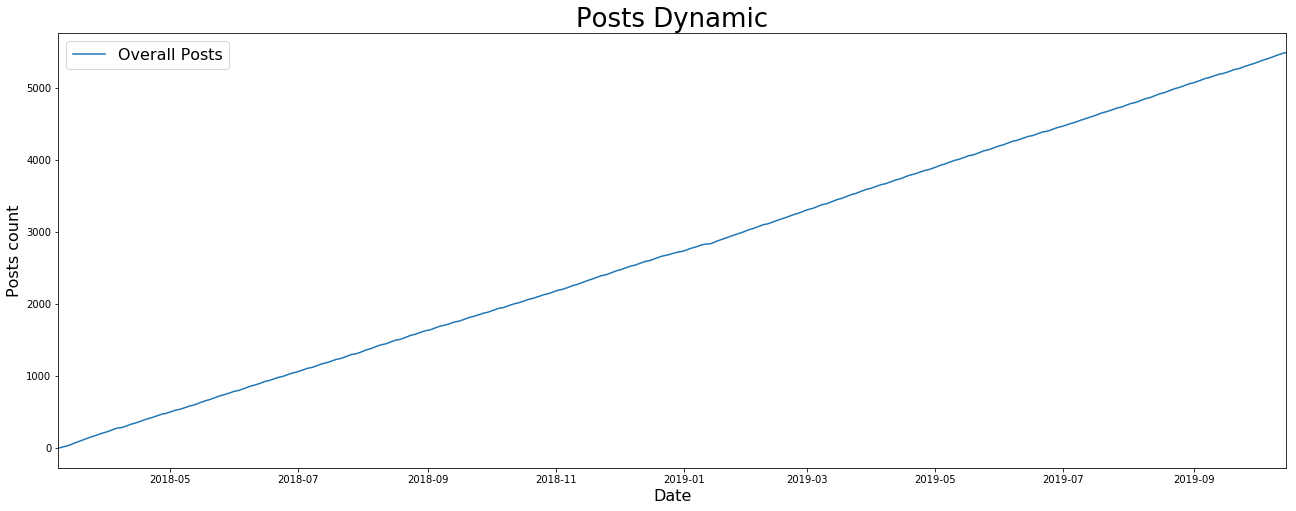

In [11]:
%matplotlib inline
import matplotlib.pylab as plt
plt.title('Posts Dynamic', fontsize=26)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Posts count', fontsize=16)
total_history.value_counts().sort_index().cumsum().plot(figsize=(22,8), label='Overall Posts')
plt.legend(fontsize=16)
plt.savefig('allposts.png', fps=150)

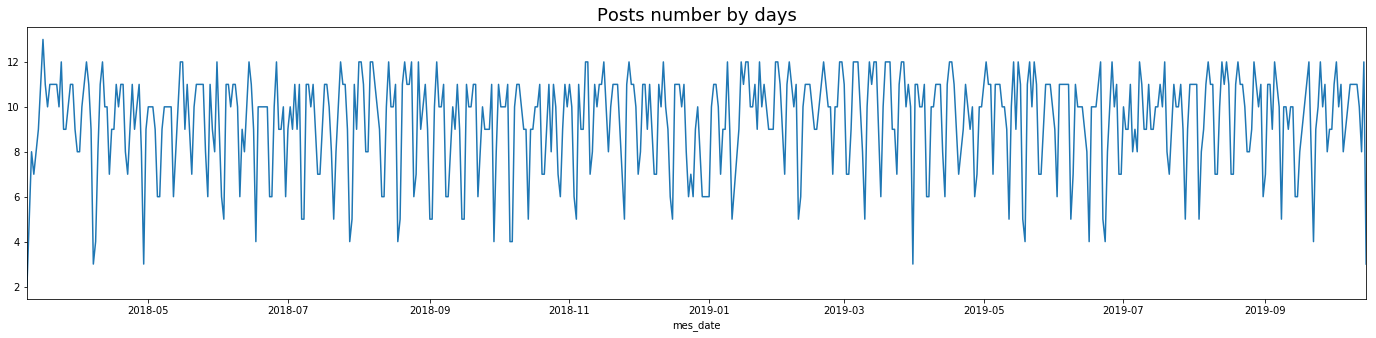

In [12]:
import matplotlib.pylab as plt
%matplotlib inline

corpus.groupby(corpus.mes_date.dt.date).count().mes_date.plot(figsize=(24,5))
plt.title('Posts number by days', fontsize=18)
plt.savefig('by date.png', fps=400)

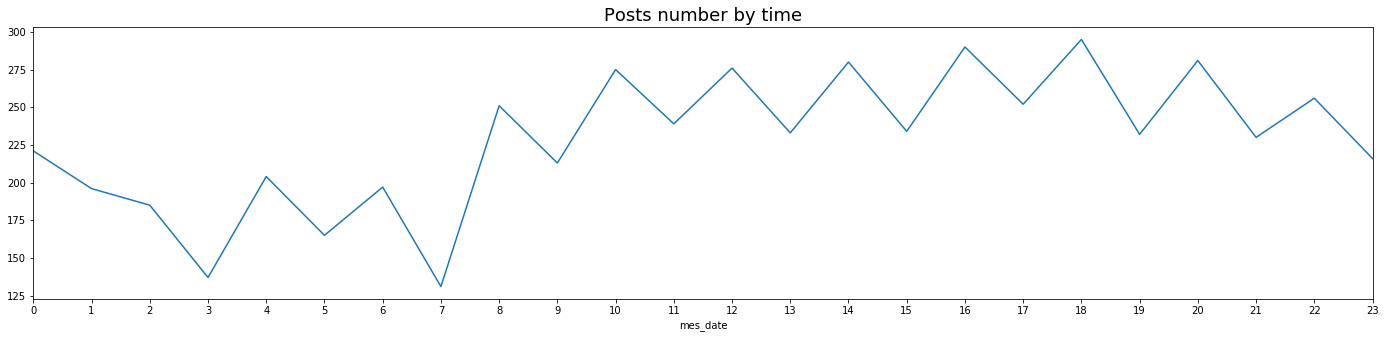

In [13]:
corpus.groupby(corpus.mes_date.dt.hour).count().mes_date.plot(figsize=(24,5))
plt.title('Posts number by time', fontsize=18)
plt.xticks(range(24))
plt.savefig('by hours.png', fps=400)
plt.show()

In [14]:
total_views = pd.pivot_table(corpus, values = 'views', columns=['mes_date'], aggfunc=np.sum).T
#total_views = total_views.reset_index(drop=True)['mes_date'].dt.date.sort_values()
#total_views.head(2)

In [15]:
total_views = total_views.reset_index()
total_views.head(2)

,mes_date,views
0,2018-03-09 20:37:02+00:00,133.0
1,2018-03-09 22:37:07+00:00,153.0


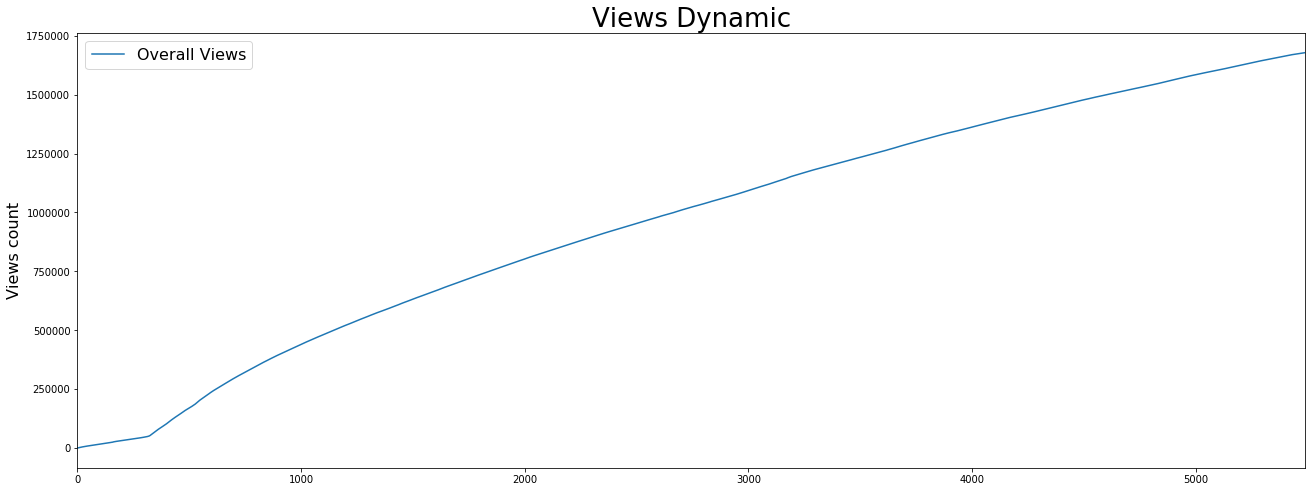

In [16]:
%matplotlib inline
import matplotlib.pylab as plt
plt.title('Views Dynamic', fontsize=26)
plt.ylabel('Views count', fontsize=16)
total_views.views.cumsum().plot(figsize=(22,8), label='Overall Views')
plt.legend(fontsize=16)
plt.savefig('allViews.png', fps=150)

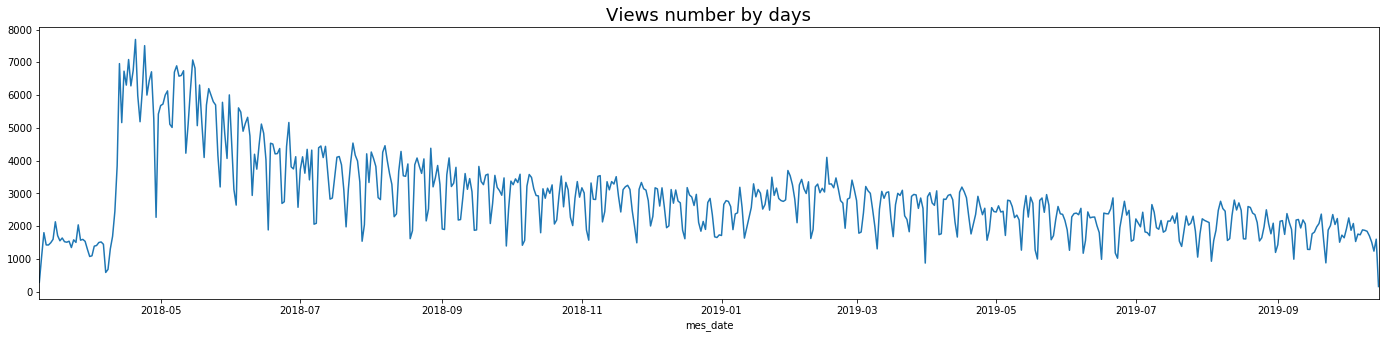

In [17]:
import matplotlib.pylab as plt
%matplotlib inline

total_views.groupby(total_views.mes_date.dt.date).views.sum().plot(figsize=(24,5))
plt.title('Views number by days', fontsize=18)
plt.savefig('views by date.png', fps=400)

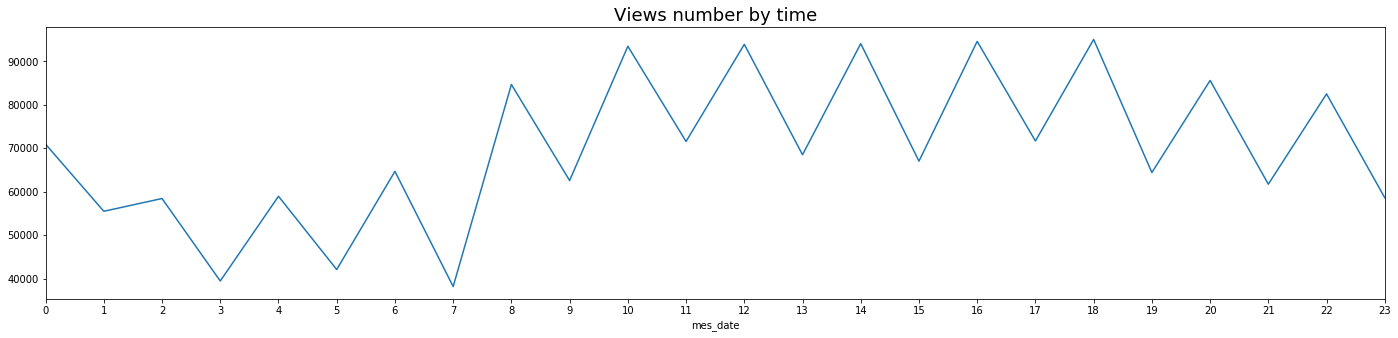

In [18]:
total_views.groupby(total_views.mes_date.dt.hour).views.sum().plot(figsize=(24,5))
plt.title('Views number by time', fontsize=18)
plt.xticks(range(24))
plt.savefig('Views by hours.png', fps=400)
plt.show()

In [19]:
from wordcloud import WordCloud

In [20]:
corpus.head(2)

,id,text,mes_date,views,mes_title,mes_description
5494,42,новые вакансии за последние 2 часа,2018-03-09 20:37:02+00:00,133,новые вакансии за последние 2 часа,последние 2 часа опубликовано 5 вакансий block...
5493,43,новые вакансии за последние 2 часа,2018-03-09 22:37:07+00:00,153,новые вакансии за последние 2 часа,последние 2 часа опубликовано 3 вакансий remot...


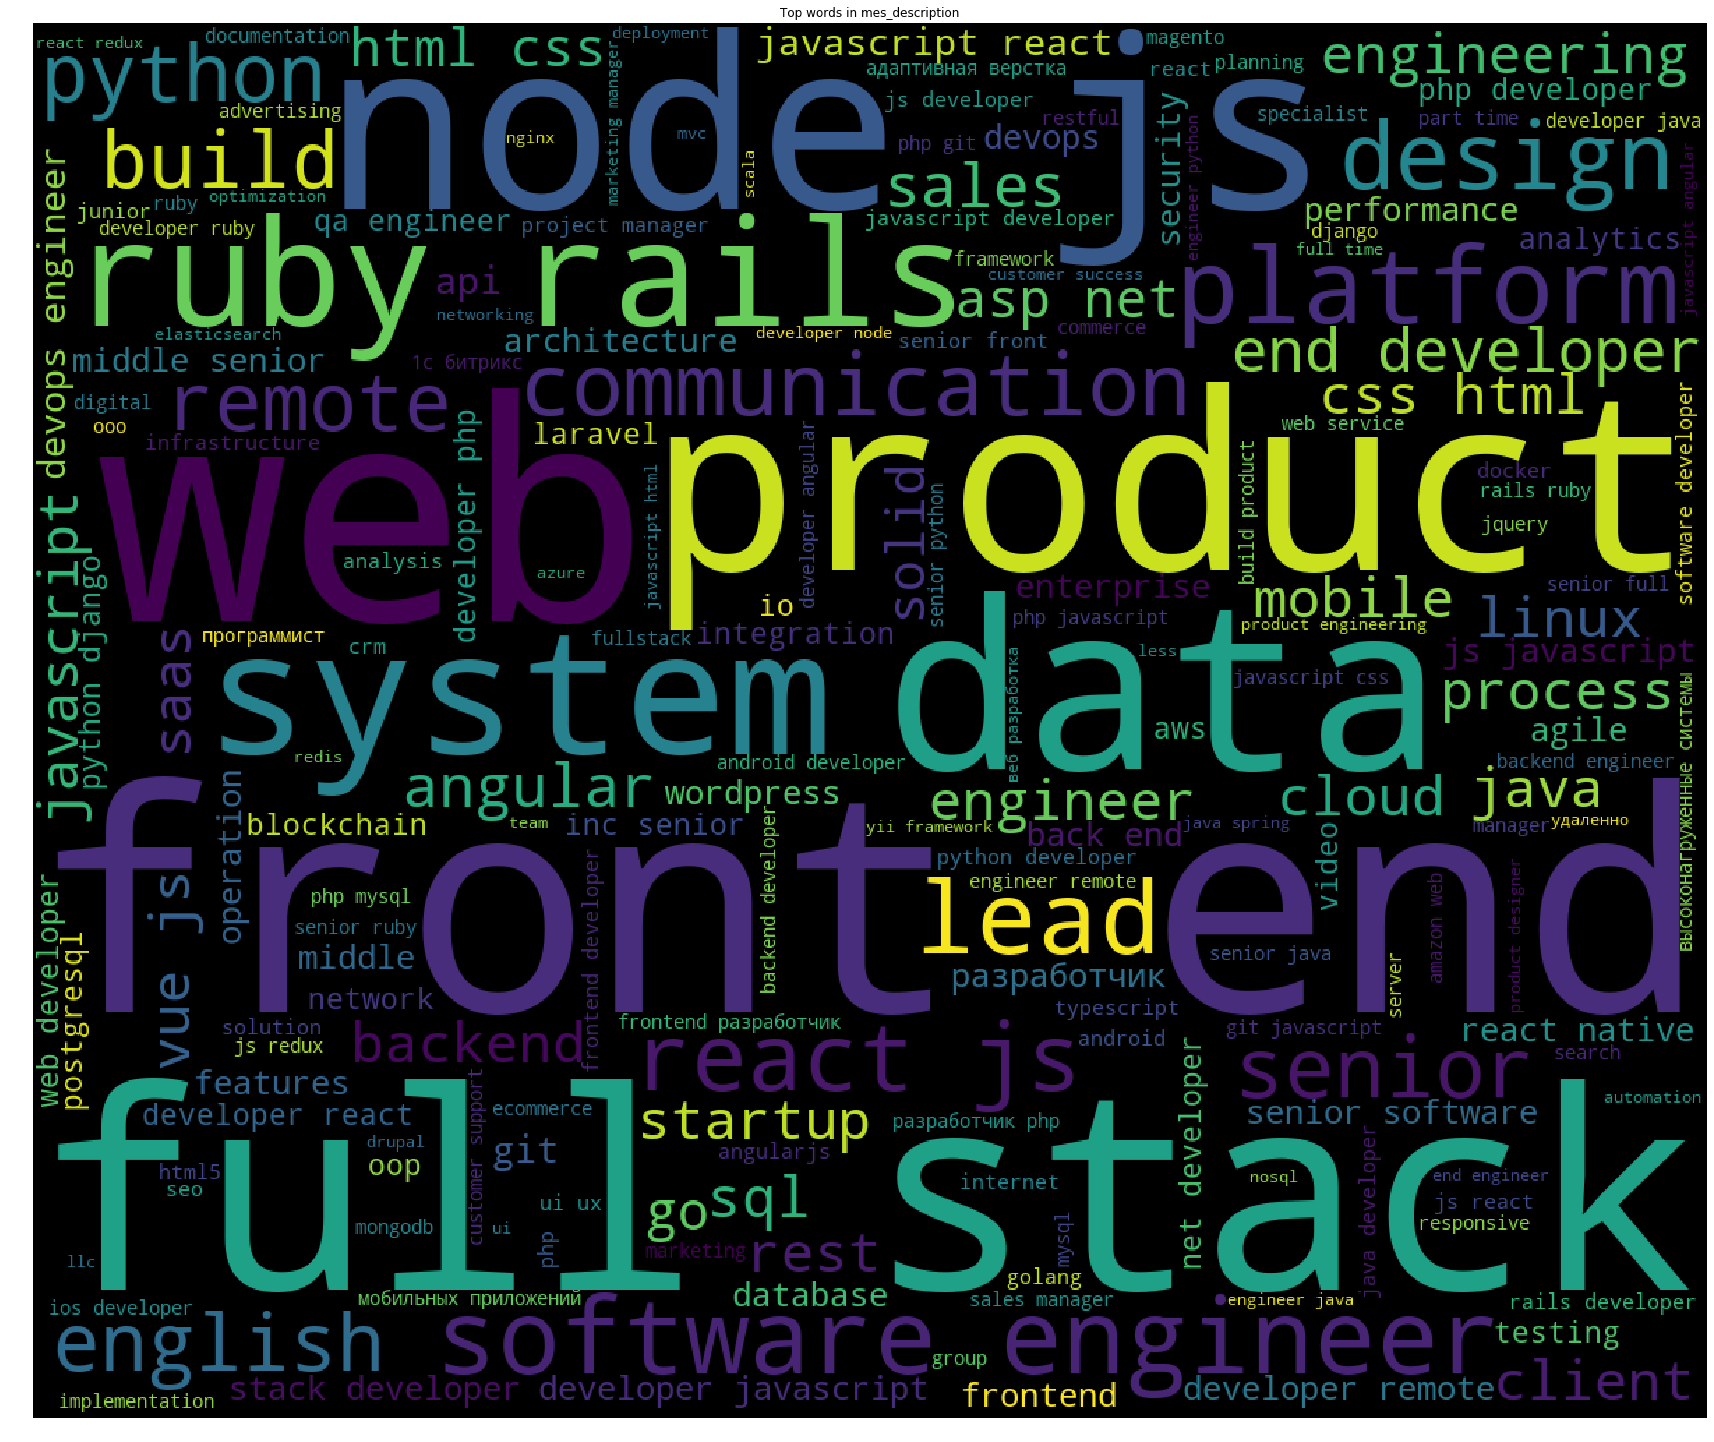

In [21]:
text = ' '.join(corpus['mes_description'])
wordcloud = WordCloud(max_font_size=None, background_color='black',
                      width=1200, height=1000).generate(text)
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud)
plt.title('Top words in mes_description')
plt.axis("off")
plt.show()

In [22]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import time

def get_words_by_threshold_report(text_series, min_df=0.02, max_df=0.75):
    vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)

    counts = vectorizer.fit_transform(text_series)
    corpus_id2word = {value: key for key, value in vectorizer.vocabulary_.items()}

    print('Words in dictionary: {}\n'.format(counts.shape[1]))
    print('Dictionary before threshold filtration: ', Counter(' '.join(text_series.values).split()).most_common(20), '\n')

    print('Words under top threshold:   ', [corpus_id2word[elem] for elem in np.argsort(np.array(counts.sum(axis=0)).ravel())[-40:][::-1]])
    print()
    print('Words upper bottom threshold:', [corpus_id2word[elem] for elem in np.argsort(np.array(counts.sum(axis=0)).ravel())[:20]])
    return counts, vectorizer, corpus_id2word

def get_lda_model(counts, corpus_id2word, num_topics=10, alpha_value=0.1, var_iter=50, passes=50):
    gensim_corpus = gensim.matutils.Scipy2Corpus(counts)
    t_start = time.time()
    lda = gensim.models.LdaModel(
        corpus=gensim_corpus,
        passes=passes,
        num_topics=num_topics,
        alpha=[alpha_value] * num_topics,
        iterations=var_iter,
        id2word=corpus_id2word,
        eval_every=0,
        random_state=42
    )
    current_score = lda.bound(gensim_corpus)
    time_ellapsed = int(time.time() - t_start)

    print('ELBO = {1:.4f}, time: {2} seconds'.format(
        alpha_value, current_score, time_ellapsed))
    
    gamma, _ = lda.inference(gensim_corpus)
    gamma = gamma / gamma.sum(1).reshape(-1, 1)
    
    return lda, gamma

def build_topic_words_report(lda, top_words_num=25, topic_names=None):
    if topic_names==None:
        topic_names = [''] * lda.num_topics
    topic_space = max(map(len, topic_names)) + 2
    
    if topic_space==2:
        for topic_index in range(lda.num_topics):
            print('{0} topic: {1}'.format(
                topic_index, ', '.join(list(zip(*lda.show_topic(topic_index, topn=top_words_num)))[0])))
        return
    
    for topic_index in range(lda.num_topics):
        print('{0} topic :{1: ^{2}}: {3}'.format(
            topic_index, topic_names[topic_index], topic_space,
            ', '.join(list(zip(*lda.show_topic(topic_index, topn=top_words_num)))[0])))
        
def build_topic_subjects_report(lda, gamma, text_series, topic_names=None):
    if topic_names==None:
        topic_names = [''] * lda.num_topics
    for topic_index in range(lda.num_topics):
        print('Topic {0} - {1}'.format(topic_index, topic_names[topic_index]))
        best_doc_indexes = gamma[:, topic_index].argsort()[-10:][::-1]
        
        subjects_with_proba = []
        for person_count, doc in enumerate(best_doc_indexes):
            if gamma[doc, topic_index] > 0.01 or person_count<3:
                subjects_with_proba.append('{0} - {1:.1%}'.format(text_series.index[doc], gamma[doc, topic_index]))
        print(', '.join(subjects_with_proba), '\n')

In [23]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['mes_description'], min_df=0.05, max_df=0.85)

Words in dictionary: 37

Dictionary before threshold filtration:  [('developer', 1856), ('engineer', 1227), ('senior', 1102), ('javascript', 1057), ('js', 993), ('web', 822), ('react', 819), ('php', 714), ('product', 703), ('ruby', 556), ('end', 551), ('java', 543), ('python', 532), ('software', 531), ('c', 516), ('data', 507), ('full', 488), ('remote', 469), ('build', 465), ('разработчик', 454)] 

Words under top threshold:    ['developer', 'engineer', 'senior', 'javascript', 'js', 'web', 'react', 'php', 'product', 'ruby', 'end', 'java', 'python', 'software', 'data', 'full', 'remote', 'build', 'разработчик', 'front', 'stack', 'rails', 'design', 'lead', 'html', 'css', 'git', 'communication', 'node', 'engineering', 'platform', 'middle', 'manager', 'sql', 'backend', 'english', 'inc']

Words upper bottom threshold: ['inc', 'english', 'backend', 'sql', 'manager', 'middle', 'platform', 'engineering', 'node', 'communication', 'git', 'css', 'html', 'lead', 'design', 'rails', 'stack', 'front',

In [24]:
lda_norm, gamma_norm = get_lda_model(counts, corpus_id2word, num_topics=5)

ELBO = -72913.4208, time: 36 seconds


In [25]:
build_topic_words_report(lda_norm, top_words_num=15)

0 topic: product, lead, web, design, manager, communication, end, remote, build, developer, front, senior, engineering, platform, inc
1 topic: engineer, software, data, senior, platform, engineering, product, build, web, inc, backend, python, design, remote, javascript
2 topic: developer, java, python, senior, english, sql, middle, backend, remote, git, communication, inc, разработчик, web, design
3 topic: js, javascript, react, php, developer, html, css, node, разработчик, end, git, front, senior, web, middle
4 topic: ruby, full, stack, rails, developer, javascript, web, senior, remote, react, git, разработчик, engineering, build, middle


In [26]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['mes_description'], min_df=0.025, max_df=0.45)
lda_norm_45, gamma_norm_45 = get_lda_model(counts, corpus_id2word, num_topics=5)

Words in dictionary: 69

Dictionary before threshold filtration:  [('developer', 1856), ('engineer', 1227), ('senior', 1102), ('javascript', 1057), ('js', 993), ('web', 822), ('react', 819), ('php', 714), ('product', 703), ('ruby', 556), ('end', 551), ('java', 543), ('python', 532), ('software', 531), ('c', 516), ('data', 507), ('full', 488), ('remote', 469), ('build', 465), ('разработчик', 454)] 

Words under top threshold:    ['developer', 'engineer', 'senior', 'javascript', 'js', 'web', 'react', 'php', 'product', 'ruby', 'end', 'java', 'python', 'software', 'data', 'full', 'remote', 'build', 'разработчик', 'front', 'stack', 'rails', 'design', 'lead', 'html', 'css', 'git', 'communication', 'node', 'engineering', 'middle', 'platform', 'sales', 'manager', 'sql', 'backend', 'angular', 'devops', 'net', 'frontend']

Words upper bottom threshold: ['solid', 'docker', 'oop', 'system', 'marketing', 'client', 'junior', 'redux', 'framework', 'startup', 'process', 'ui', 'saas', 'testing', 'wordp

In [27]:
build_topic_words_report(
    lda_norm_45, top_words_num=14,
    topic_names=['product', 'software engineering', 'backend', 'frontend', 'fullstack'] * 5)

0 topic :       product        : product, sales, communication, manager, lead, english, build, design, designer, ui, startup, marketing, web, client
1 topic : software engineering : developer, java, full, stack, net, android, senior, web, remote, sql, angular, mobile, design, middle
2 topic :       backend        : engineer, ruby, software, senior, rails, data, devops, qa, engineering, product, platform, build, cloud, systems
3 topic :       frontend       : js, react, javascript, developer, end, front, html, css, node, frontend, angular, senior, redux, web
4 topic :      fullstack       : php, developer, python, ios, git, разработчик, mysql, sql, postgresql, backend, linux, senior, javascript, middle


In [28]:
build_topic_subjects_report(lda_norm_45, gamma_norm_45, corpus['mes_description'])

Topic 0 - 
1028 - 95.3%, 2439 - 95.3%, 1367 - 95.3%, 1806 - 95.3%, 2043 - 94.7%, 309 - 94.7%, 2964 - 94.7%, 2760 - 94.7%, 1020 - 94.7%, 2767 - 94.7% 

Topic 1 - 
1103 - 96.2%, 1042 - 96.2%, 1898 - 96.2%, 3958 - 95.8%, 4658 - 95.8%, 2438 - 95.8%, 2102 - 95.8%, 3521 - 95.8%, 4329 - 95.8%, 2307 - 95.8% 

Topic 2 - 
2915 - 96.2%, 3481 - 96.2%, 124 - 95.8%, 3752 - 95.8%, 1062 - 95.3%, 279 - 95.3%, 848 - 95.3%, 25 - 95.3%, 164 - 95.3%, 604 - 95.3% 

Topic 3 - 
1491 - 96.8%, 88 - 96.8%, 3878 - 96.8%, 2597 - 96.8%, 1032 - 96.8%, 641 - 96.8%, 4118 - 96.8%, 2242 - 96.8%, 5230 - 96.8%, 28 - 96.5% 

Topic 4 - 
1051 - 96.5%, 2894 - 96.5%, 2904 - 96.2%, 5430 - 96.2%, 2623 - 95.8%, 1617 - 95.8%, 2716 - 95.8%, 533 - 95.8%, 4863 - 95.8%, 2642 - 95.3% 



In [29]:
week_text = corpus.groupby(corpus.mes_date.apply(lambda x: '{1}-{0}'.format(x.week, x.year))).agg(lambda x: ' '.join(x))['mes_description']
print(week_text.shape)
week_text.head()

(86,)


mes_date
2018-1     close io inbound account executive central eas...
2018-10    последние 2 часа опубликовано 5 вакансий block...
2018-11    rootsrated media software engineer react js po...
2018-12    auth0 engineer integrations node js react js s...
2018-13     энсайн nsign ru программист php yii2 frontend...
Name: mes_description, dtype: object

In [30]:
morph = pymorphy2.MorphAnalyzer()
week_text_filter = week_text
week_text_filter.head()

mes_date
2018-1     close io inbound account executive central eas...
2018-10    последние 2 часа опубликовано 5 вакансий block...
2018-11    rootsrated media software engineer react js po...
2018-12    auth0 engineer integrations node js react js s...
2018-13     энсайн nsign ru программист php yii2 frontend...
Name: mes_description, dtype: object

In [31]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['mes_description'], min_df=0.025, max_df=0.45)

Words in dictionary: 69

Dictionary before threshold filtration:  [('developer', 1856), ('engineer', 1227), ('senior', 1102), ('javascript', 1057), ('js', 993), ('web', 822), ('react', 819), ('php', 714), ('product', 703), ('ruby', 556), ('end', 551), ('java', 543), ('python', 532), ('software', 531), ('c', 516), ('data', 507), ('full', 488), ('remote', 469), ('build', 465), ('разработчик', 454)] 

Words under top threshold:    ['developer', 'engineer', 'senior', 'javascript', 'js', 'web', 'react', 'php', 'product', 'ruby', 'end', 'java', 'python', 'software', 'data', 'full', 'remote', 'build', 'разработчик', 'front', 'stack', 'rails', 'design', 'lead', 'html', 'css', 'git', 'communication', 'node', 'engineering', 'middle', 'platform', 'sales', 'manager', 'sql', 'backend', 'angular', 'devops', 'net', 'frontend']

Words upper bottom threshold: ['solid', 'docker', 'oop', 'system', 'marketing', 'client', 'junior', 'redux', 'framework', 'startup', 'process', 'ui', 'saas', 'testing', 'wordp

In [32]:
lda_norm_45, gamma_norm_45 = get_lda_model(counts, corpus_id2word, num_topics=5)

ELBO = -109222.4411, time: 39 seconds


In [33]:
build_topic_words_report(
    lda_norm_45, top_words_num=14,
    topic_names=['product', 'software engineering', 'backend', 'frontend', 'fullstack'] * 5)

0 topic :       product        : product, sales, communication, manager, lead, english, build, design, designer, ui, startup, marketing, web, client
1 topic : software engineering : developer, java, full, stack, net, android, senior, web, remote, sql, angular, mobile, design, middle
2 topic :       backend        : engineer, ruby, software, senior, rails, data, devops, qa, engineering, product, platform, build, cloud, systems
3 topic :       frontend       : js, react, javascript, developer, end, front, html, css, node, frontend, angular, senior, redux, web
4 topic :      fullstack       : php, developer, python, ios, git, разработчик, mysql, sql, postgresql, backend, linux, senior, javascript, middle


In [35]:
def weekpair_2date(pair):
    atime = time.strptime('{} {} 1'.format(*pair.split('-')), '%Y %W %w')
    return pd.to_datetime('{0}-{1}-{2}'.format(atime.tm_year, atime.tm_mon, atime.tm_mday))

topic_dynamic = pd.DataFrame(week_text_filter)
#topic_dynamic['topic'] = np.argmax(gamma_week, axis=1)
topic_dynamic['post_count'] = week_text.apply(len)
topic_dynamic['date'] = list(map(weekpair_2date, topic_dynamic.index))
topic_dynamic.sort_values('date', inplace=True)
topic_dynamic.head()

,mes_description,post_count,date
mes_date,,,
2018-1,close io inbound account executive central eas...,427,2018-01-01
2018-10,последние 2 часа опубликовано 5 вакансий block...,2898,2018-03-05
2018-11,rootsrated media software engineer react js po...,5429,2018-03-12
2018-12,auth0 engineer integrations node js react js s...,6776,2018-03-19
2018-13,энсайн nsign ru программист php yii2 frontend...,5479,2018-03-26


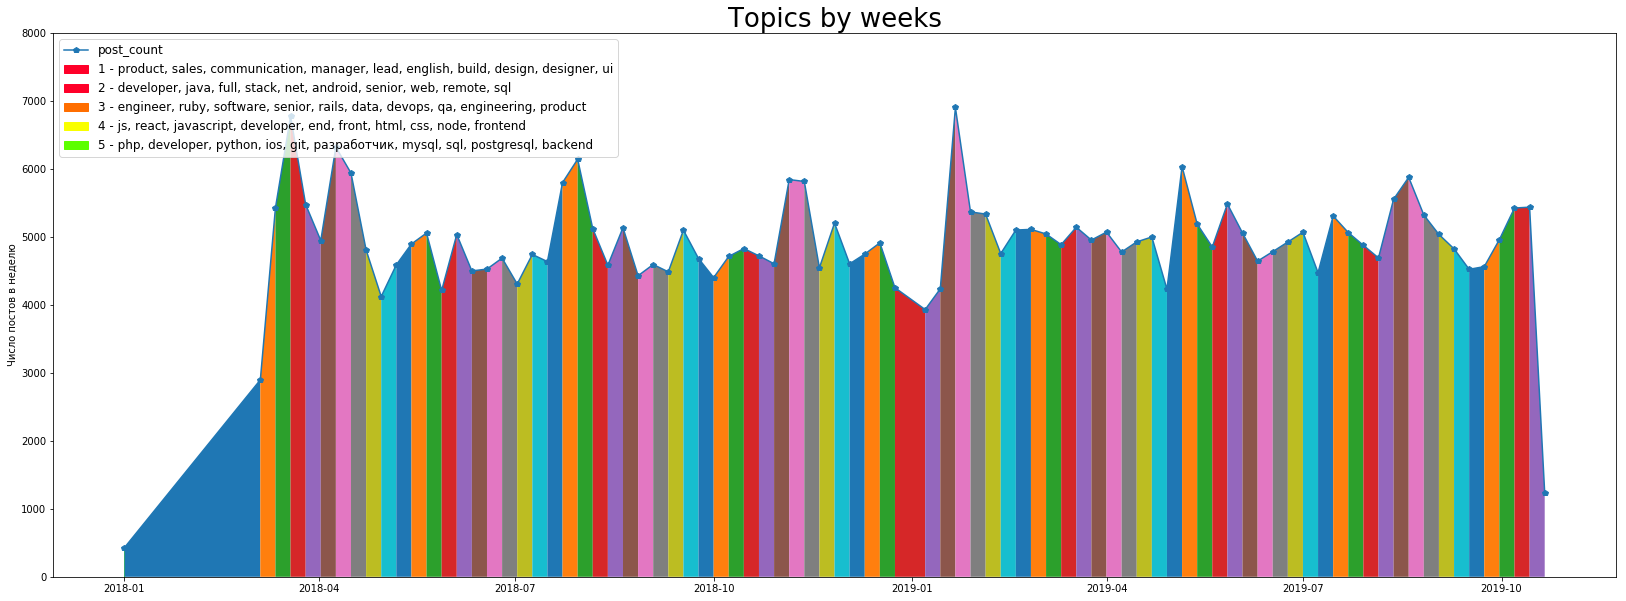

In [39]:
import matplotlib as mpl
cmap = mpl.cm.gist_rainbow
normalize = mpl.colors.Normalize(vmin=1, vmax=10)
cmap(normalize(3))

plt.figure(figsize=(28,10))
plt.plot(topic_dynamic.date, topic_dynamic.post_count, '-p')

for topic_index in range(lda_norm_45.num_topics):
    plt.fill_between(
        y1=0, y2=topic_dynamic.post_count[:1], 
        x=topic_dynamic.date.values[:1], 
        color=cmap(normalize(topic_index)),
        label = '{0} - {1}'.format(topic_index + 1, ', '.join(list(zip(*lda_norm_45.show_topic(topic_index, topn=10)))[0]))
    )
for step in range(topic_dynamic.shape[0]):
    plt.fill_between(
        y1=0, y2=topic_dynamic.post_count[step: step+2], 
        x=topic_dynamic.date.values[step: step+2], 
       # color=cmap(normalize(topic_dynamic.topic.iloc[step])),
    )

plt.ylim(0, 8000)
plt.legend(fontsize=12, loc='upper left')
plt.ylabel('Число постов в неделю')
plt.title('Topics by weeks', fontsize=26)
plt.savefig('topic_history.png')
plt.show()